In [2]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
arch = inception_4
sz=320
bs = 32
path='data/hackerearth-myntra'

In [4]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [5]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=2)

In [6]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.4)

100%|██████████| 428/428 [04:45<00:00,  1.50it/s]


In [7]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 77%|███████▋  | 1318/1709 [00:16<00:04, 80.45it/s, loss=6.15]

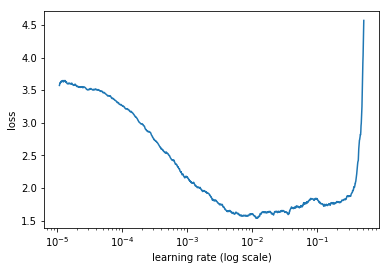

 77%|███████▋  | 1318/1709 [00:30<00:08, 43.89it/s, loss=6.15]

In [8]:
learn.sched.plot()

In [9]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 18%|█▊        | 315/1709 [00:06<00:30, 45.47it/s, loss=2]   

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.519495   1.316845   0.632886  
    1      1.391608   1.236096   0.647926                      
    2      1.321397   1.200498   0.65311                       
    3      1.290121   1.175883   0.660704                      
    4      1.259656   1.157324   0.662456                      



[1.1573242, 0.66245619158878499]

In [10]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.198546   1.148684   0.666983  
    1      1.228396   1.139503   0.666837                      
    2      1.179075   1.12231    0.670926                      
    3      1.175514   1.116734   0.674796                      
    4      1.213724   1.111954   0.674796                      



[1.1119545, 0.67479556074766356]

In [11]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.162358   1.112239   0.674138  
    1      1.134548   1.107679   0.67684                       
    2      1.153752   1.10794    0.675599                      
    3      1.164292   1.105914   0.67611                       
    4      1.148863   1.103337   0.678446                      



[1.1033366, 0.67844626168224298]

In [12]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.118635   1.100221   0.678592  
    1      1.1714     1.099148   0.679249                     
    2      1.152048   1.097311   0.679176                      
    3      1.223249   1.098616   0.677862                      
    4      1.145827   1.097348   0.678081                      



[1.0973482, 0.67808119158878499]

In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [14]:
log_preds,y = learn.TTA()


In [15]:
probs = np.mean(np.exp(log_preds),0)

In [16]:
accuracy_np(probs, y)

0.67764120573602571

In [17]:
y[10]=9

In [18]:
predictions = np.argmax(probs,axis=1)

In [19]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[  59    2    6    0    7   10   30   30  106    0    4    0   15    0    0   55    0    0   33    5    0
     0   92    0]
 [   2   19    0    0    0    1    3    2   24    0    2    0   12    0    0    2    0    0    0    2    0
     0   55    0]
 [   4    0   12    0    1    0    7    0    7    0    0    0    0    0    0    6    0    0    2    0    0
     0    6    0]
 [   0    0    0    6    0    0    0    7    0    0    1    0    0    0    0   12    0    0   19    0    0
     0    1    0]
 [   2    0    0    0  212    0    1    3    4    0    1    0    0    0    0  219    0    0   41    0    0
     0   30    0]
 [   9    1    0    0    0  103   25   22   28    0    3    0    0    0    0   18    0    0   11    0    0
     0   52    0]
 [  18    0    3    0    0   10  133    5   53    0    2    0   10    0    0   17    0    0   11    0    0
     0   45    0]
 [  17    0    2    0    9   23   17  110   17    0    0    0    0    0    0  110    

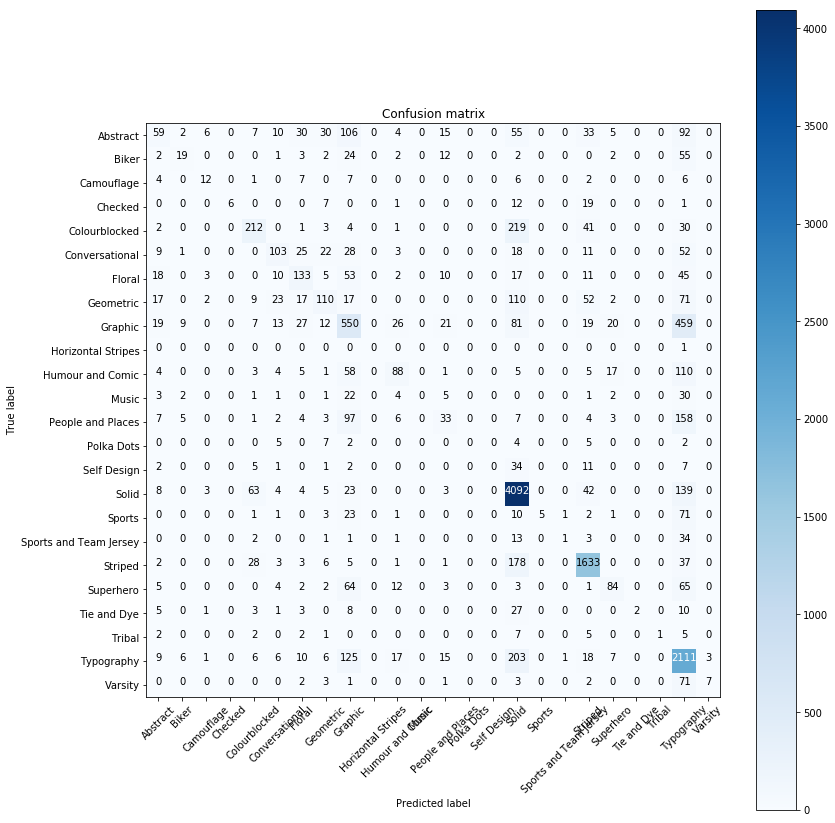

In [20]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.12996  0.00441  0.01322  0.       0.01542  0.02203  0.06608  0.06608  0.23348  0.       0.00881  0.
   0.03304  0.       0.       0.12115  0.       0.       0.07269  0.01101  0.       0.       0.20264  0.     ]
 [ 0.01613  0.15323  0.       0.       0.       0.00806  0.02419  0.01613  0.19355  0.       0.01613  0.
   0.09677  0.       0.       0.01613  0.       0.       0.       0.01613  0.       0.       0.44355  0.     ]
 [ 0.08889  0.       0.26667  0.       0.02222  0.       0.15556  0.       0.15556  0.       0.       0.       0.
   0.       0.       0.13333  0.       0.       0.04444  0.       0.       0.       0.13333  0.     ]
 [ 0.       0.       0.       0.13043  0.       0.       0.       0.15217  0.       0.       0.02174  0.       0.
   0.       0.       0.26087  0.       0.       0.41304  0.       0.       0.       0.02174  0.     ]
 [ 0.0039   0.       0.       0.       0.41326  0.       0.00195  0.00585  0.0078   0.       0.00195  0.    

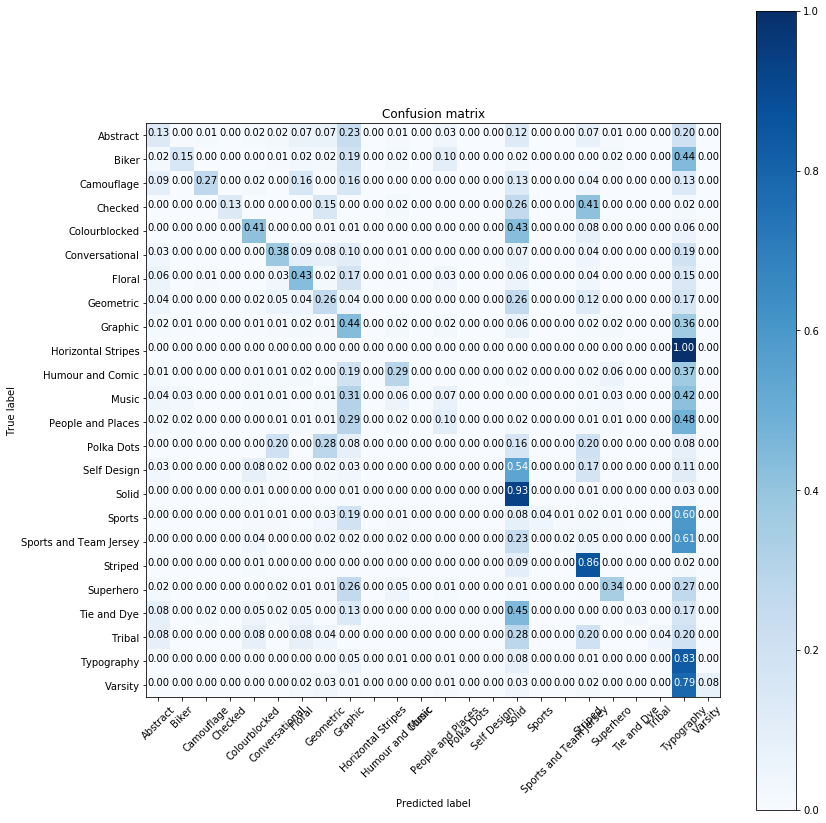

In [21]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

# 0.2 -> must overfit a bit 

In [22]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [23]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████▏ | 1390/1709 [00:14<00:03, 98.95it/s, loss=6.01]

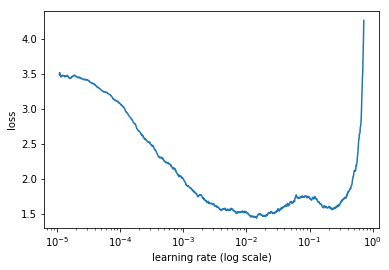

In [24]:
learn.sched.plot()

In [25]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 13%|█▎        | 220/1709 [00:05<00:38, 38.66it/s, loss=1.48]

Exception in thread Thread-32:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.25913    1.153367   0.662602  
    1      1.140221   1.110037   0.67297                       
    2      1.143047   1.083797   0.681586                      
    3      1.096232   1.07199    0.685675                       
    4      0.998399   1.055937   0.689544                      



[1.0559369, 0.68954439252336452]

In [26]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.963578   1.06183    0.687719  
    1      0.974971   1.047204   0.69137                        



[1.0472041, 0.69136974299065423]

In [27]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.967264   1.034199   0.69743   
    1      0.901322   1.048444   0.694071                       



[1.0484442, 0.69407126168224298]

In [28]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.849142   1.027983   0.702979  
    1      0.809753   1.018622   0.703563                       
    2      0.842111   1.017644   0.702322                       
    3      0.833316   1.007162   0.708674                       
    4      0.821436   1.016785   0.7059                         



[1.0167845, 0.70589953271028039]

In [29]:
learn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.779294   1.006299   0.706484  
    1      0.801804   1.007332   0.706265                       



[1.0073316, 0.70626460280373837]

In [30]:
learn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.797522   1.008089   0.708747  
    1      0.805688   1.015104   0.70568                        



[1.0151039, 0.70568049065420557]

In [31]:
learn.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.759361   1.006552   0.70955   
    1      0.803788   1.005329   0.710207                       



[1.0053293, 0.71020735981308414]

In [32]:
log_preds,y = learn.TTA()


In [33]:
probs = np.mean(np.exp(log_preds),0)

In [34]:
accuracy_np(probs, y)

0.70968685981855428

In [35]:
y[10]=9

In [36]:
predictions = np.argmax(probs,axis=1)

In [37]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[  94    3    4    0    4   10   32   34   97    0    8    0   18    0    0   40    2    0   22    8    3
     1   74    0]
 [   1   35    0    0    0    1    3    1   22    0    1    0   15    0    0    1    0    0    0    2    1
     0   41    0]
 [   4    0   17    0    2    0    4    2    6    0    0    0    0    0    0    4    0    0    1    0    0
     0    5    0]
 [   2    0    0   15    1    1    0    6    1    0    0    0    0    0    0    8    0    0   12    0    0
     0    0    0]
 [   3    0    0    0  252    0    2    6    6    0    1    0    1    0    0  177    0    0   43    0    0
     0   22    0]
 [  15    0    1    1    0  104   22   28   38    0    4    0    1    0    0   12    0    0    7    3    0
     0   36    0]
 [  22    0    1    0    0   11  162    6   46    0    1    0    4    0    1   13    0    0    5    0    0
     0   35    0]
 [  19    0    1    2    9   23    8  179   28    0    1    0    0    0    0   67    

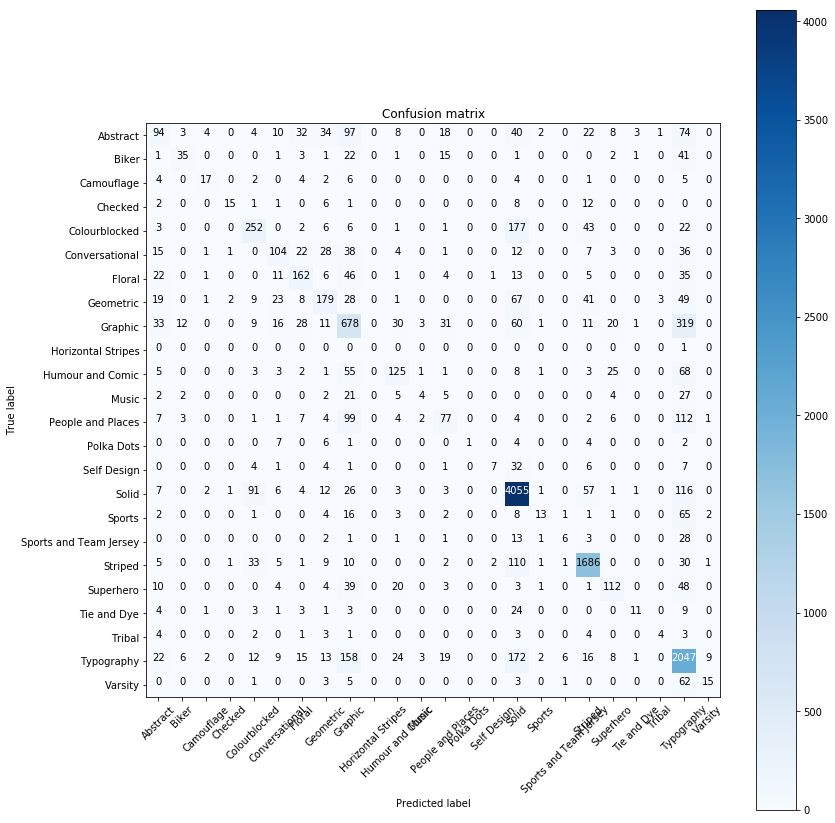

In [38]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.20705  0.00661  0.00881  0.       0.00881  0.02203  0.07048  0.07489  0.21366  0.       0.01762  0.
   0.03965  0.       0.       0.08811  0.00441  0.       0.04846  0.01762  0.00661  0.0022   0.163    0.     ]
 [ 0.00806  0.28226  0.       0.       0.       0.00806  0.02419  0.00806  0.17742  0.       0.00806  0.
   0.12097  0.       0.       0.00806  0.       0.       0.       0.01613  0.00806  0.       0.33065  0.     ]
 [ 0.08889  0.       0.37778  0.       0.04444  0.       0.08889  0.04444  0.13333  0.       0.       0.       0.
   0.       0.       0.08889  0.       0.       0.02222  0.       0.       0.       0.11111  0.     ]
 [ 0.04348  0.       0.       0.32609  0.02174  0.02174  0.       0.13043  0.02174  0.       0.       0.       0.
   0.       0.       0.17391  0.       0.       0.26087  0.       0.       0.       0.       0.     ]
 [ 0.00585  0.       0.       0.       0.49123  0.       0.0039   0.0117   0.0117   0.       0.00195  0.
   

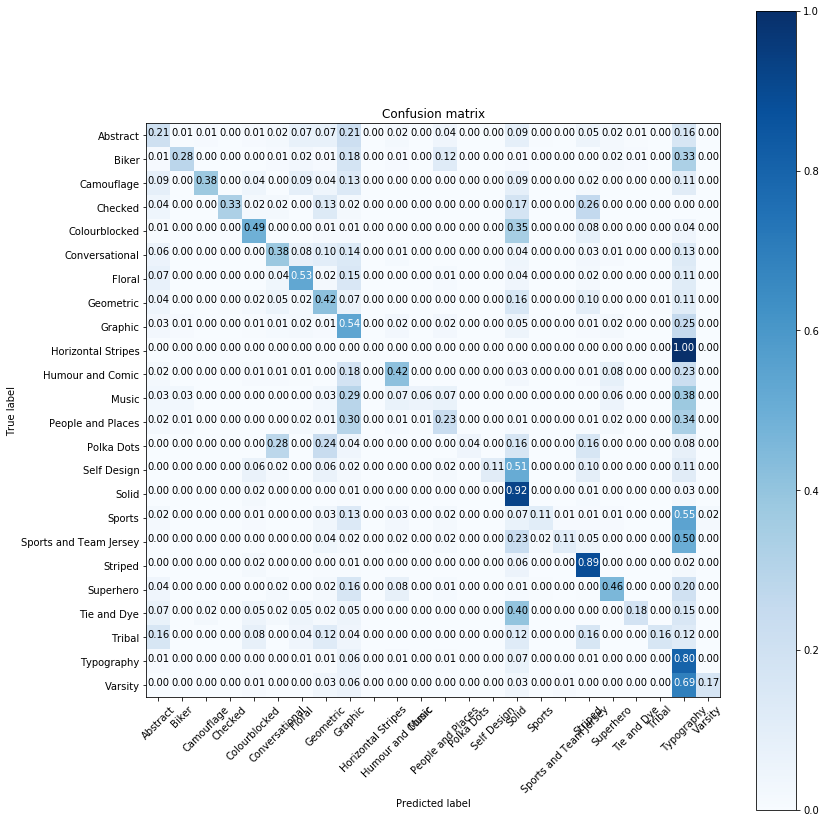

In [39]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

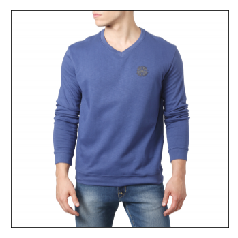

In [46]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.val_dl))


In [70]:
x,y=next(iter(data.val_dl))


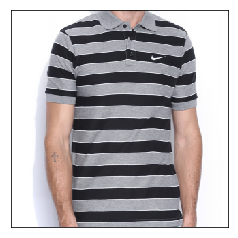

In [89]:
show_img(data.val_ds.denorm(to_np(x))[20]);